# Importing csv

In [3]:
import pandas as pd

plants=pd.read_csv('../plantbase/data/plants_with_image_dimensions_v1.csv').drop(columns='Unnamed: 0')

In [4]:
plants.head()

,id,family,genus,species,content,filename,image_height,image_width
0,1,Amaryllidaceae,Narcissus,Narcissus dubius Gouan,Entire,1.jpg,512,800
1,100014,Scrophulariaceae,Verbascum,Verbascum pulverulentum Vill.,Leaf,100014.jpg,600,800
2,100022,Orchidaceae,Ophrys,Ophrys scolopax Cav.,Entire,100022.jpg,587,800
3,100038,Iridaceae,Iris,Iris lutescens Lam.,Flower,100038.jpg,600,800
4,100069,Rosaceae,Crataegus,Crataegus azarolus L.,Stem,100069.jpg,800,533


# Exploring the 'content' column

In [5]:
#sorting the dataset by genus and content 
contents=plants.groupby(["genus", "content"]).size().reset_index(name="count")
contents[contents['content']=='Flower']

,genus,content,count
2,Campanula,Flower,365
8,Crataegus,Flower,175
14,Galanthus,Flower,26
19,Geranium,Flower,420
26,Hyacinthoides,Flower,45
32,Hydrangea,Flower,13
37,Iris,Flower,148
42,Jasminum,Flower,18
48,Lavandula,Flower,32
52,Narcissus,Flower,213


In [23]:
contents['genus'].unique()

array(['Campanula', 'Crataegus', 'Galanthus', 'Geranium', 'Hyacinthoides',
       'Hydrangea', 'Iris', 'Jasminum', 'Lavandula', 'Narcissus',
       'Ophrys', 'Rhododendron', 'Rosa', 'Tulipa', 'Verbascum',
       'Wisteria'], dtype=object)

In [4]:
#sorting the dataset by genus and count 
contents=contents.sort_values(['genus','count'],ascending=[True, False])

contents.head(15)

,genus,content,count
2,Campanula,Flower,365
1,Campanula,Entire,171
4,Campanula,Leaf,69
0,Campanula,Branch,49
5,Campanula,Stem,13
3,Campanula,Fruit,6
11,Crataegus,LeafScan,330
8,Crataegus,Flower,175
10,Crataegus,Leaf,167
9,Crataegus,Fruit,107


In [5]:
#understanding how many content cateogories by plants
contents.groupby('genus').count().drop(columns='content')

,count
genus,
Campanula,6
Crataegus,7
Galanthus,4
Geranium,7
Hyacinthoides,6
Hydrangea,5
Iris,5
Jasminum,6
Lavandula,4


# Filtering the overall dataset by selected content type 

In [6]:
#filtering the csv dataset by 'Flowers', 'Entire', 'Leaf' content types
plants=plants[(plants.content == 'Entire') | (plants.content == 'Flower')| (plants.content == 'Leaf')]

In [7]:
plants.head()

,id,family,genus,species,content,filename,image_height,image_width
0,1,Amaryllidaceae,Narcissus,Narcissus dubius Gouan,Entire,1.jpg,512,800
1,100014,Scrophulariaceae,Verbascum,Verbascum pulverulentum Vill.,Leaf,100014.jpg,600,800
2,100022,Orchidaceae,Ophrys,Ophrys scolopax Cav.,Entire,100022.jpg,587,800
3,100038,Iridaceae,Iris,Iris lutescens Lam.,Flower,100038.jpg,600,800
5,100110,Amaryllidaceae,Galanthus,Galanthus nivalis L.,Entire,100110.jpg,533,800


In [8]:
plants.to_csv("../plantbase/data/filtered_contents.csv")

# Loading the content images

In [9]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd

In [10]:
np.unique(plants.genus.values)

array(['Campanula', 'Crataegus', 'Galanthus', 'Geranium', 'Hyacinthoides',
       'Hydrangea', 'Iris', 'Jasminum', 'Lavandula', 'Narcissus',
       'Ophrys', 'Rhododendron', 'Rosa', 'Tulipa', 'Verbascum',
       'Wisteria'], dtype=object)

In [11]:
! ls ../../../roxanemomeni/project-plant-base/train

1.xml         18486.xml     38916.jpg     5929.xml      79654.xml
10.jpg        18487.jpg     38916.xml     59290.jpg     79655.jpg
10.xml        18487.xml     38917.jpg     59290.xml     79655.xml
1000.jpg      18488.jpg     38917.xml     59291.jpg     79656.jpg
1000.xml      18488.xml     38918.jpg     59291.xml     79656.xml
10000.jpg     1849.jpg      38918.xml     59292.jpg     79658.jpg
10000.xml     1849.xml      3892.jpg      59292.xml     79658.xml
100001.jpg    18490.jpg     3892.xml      59293.jpg     79659.jpg
100001.xml    18490.xml     38921.jpg     59293.xml     79659.xml
100003.jpg    18491.jpg     38921.xml     59295.jpg     79660.jpg
100003.xml    18491.xml     38923.jpg     59295.xml     79660.xml
100004.jpg    18492.jpg     38923.xml     59296.xml     79661.jpg
100004.xml    18492.xml     38924.jpg     59297.jpg     79661.xml
100005.jpg    18493.jpg     38924.xml     59297.xml     79662.jpg
100005.xml    18493.xml     38925.jpg     59298.jpg     79662.xml
100007.jpg

101928.jpg    20441.jpg     40878.jpg     61212.xml     81604.xml
101928.xml    20441.xml     40878.xml     61213.jpg     81605.jpg
101929.jpg    20442.jpg     40879.jpg     61213.xml     81605.xml
101929.xml    20442.xml     40879.xml     61214.jpg     81606.xml
10193.jpg     20443.jpg     4088.jpg      61214.xml     81607.jpg
10193.xml     20443.xml     4088.xml      61216.jpg     81607.xml
101930.jpg    20444.jpg     40881.jpg     61216.xml     81608.jpg
101930.xml    20444.xml     40881.xml     61217.jpg     81608.xml
101931.jpg    20446.jpg     40882.jpg     61217.xml     8161.jpg
101931.xml    20446.xml     40882.xml     61218.jpg     8161.xml
101933.jpg    20447.jpg     40883.jpg     61218.xml     81610.jpg
101933.xml    20447.xml     40883.xml     6122.jpg      81610.xml
101934.jpg    20448.jpg     40885.jpg     6122.xml      81611.jpg
101934.xml    20448.xml     40885.xml     61220.jpg     81611.xml
101935.jpg    20449.jpg     40886.jpg     61220.xml     81612.jpg
101935.xml  

104793.jpg    23342.jpg     43762.jpg     64105.xml     84498.jpg
104793.xml    23342.xml     43762.xml     64106.jpg     84498.xml
104794.xml    23343.jpg     43763.jpg     64106.xml     84499.jpg
104795.jpg    23343.xml     43763.xml     64107.jpg     84499.xml
104795.xml    23344.jpg     43764.jpg     64107.xml     845.jpg
104796.jpg    23344.xml     43764.xml     64109.jpg     845.xml
104796.xml    23345.jpg     43765.jpg     64109.xml     8450.jpg
104797.jpg    23345.xml     43765.xml     6411.jpg      8450.xml
104797.xml    23346.jpg     43766.jpg     6411.xml      84500.jpg
104798.jpg    23346.xml     43766.xml     64110.jpg     84500.xml
104798.xml    23347.jpg     43767.jpg     64110.xml     84501.jpg
1048.jpg      23347.xml     43767.xml     64112.jpg     84501.xml
1048.xml      23348.jpg     43768.jpg     64112.xml     84503.jpg
10480.jpg     23348.xml     43768.xml     64113.jpg     84503.xml
10480.xml     23349.xml     43769.xml     64113.xml     84504.jpg
104800.xml    23

10751.xml     2608.xml      46500.xml     66802.xml     87225.xml
107510.jpg    26080.jpg     46501.jpg     66803.jpg     87227.xml
107510.xml    26080.xml     46501.xml     66803.xml     87228.jpg
107511.jpg    26081.xml     46502.jpg     66804.jpg     87228.xml
107511.xml    26082.jpg     46502.xml     66804.xml     8723.jpg
107512.jpg    26082.xml     46503.jpg     66805.jpg     8723.xml
107512.xml    26083.xml     46503.xml     66805.xml     87230.jpg
107513.jpg    26085.jpg     46505.jpg     66806.jpg     87230.xml
107513.xml    26085.xml     46505.xml     66806.xml     87231.jpg
107514.jpg    26086.jpg     46506.jpg     66807.jpg     87231.xml
107514.xml    26086.xml     46506.xml     66807.xml     87232.jpg
107515.jpg    26087.jpg     46507.jpg     66808.jpg     87232.xml
107515.xml    26087.xml     46507.xml     66808.xml     87233.jpg
107516.jpg    26089.jpg     46508.jpg     66809.jpg     87233.xml
107516.xml    26089.xml     46508.xml     66809.xml     87234.jpg
107517.jpg  

110005.xml    28647.jpg     49026.xml     69310.xml     89777.jpg
110006.jpg    28647.xml     49027.jpg     69312.jpg     89777.xml
110006.xml    28648.jpg     49027.xml     69312.xml     89780.jpg
110007.jpg    28648.xml     49028.jpg     69313.jpg     89780.xml
110007.xml    28649.jpg     49028.xml     69313.xml     89781.jpg
110008.jpg    28649.xml     49029.jpg     69315.jpg     89781.xml
110008.xml    2865.jpg      49029.xml     69315.xml     89782.jpg
110010.jpg    2865.xml      49030.jpg     69316.jpg     89782.xml
110010.xml    28650.jpg     49030.xml     69316.xml     89784.jpg
110012.jpg    28650.xml     49031.jpg     69317.xml     89784.xml
110012.xml    28651.jpg     49031.xml     69318.jpg     89789.jpg
110013.jpg    28651.xml     49032.jpg     69318.xml     89789.xml
110013.xml    28652.jpg     49032.xml     69319.jpg     8979.jpg
110014.xml    28652.xml     49033.jpg     69319.xml     8979.xml
110015.jpg    28653.jpg     49033.xml     6932.jpg      89790.jpg
110015.xml  

112815.jpg    31444.jpg     51806.xml     72170.xml     92601.xml
112815.xml    31444.xml     51807.xml     72171.jpg     92603.jpg
112816.jpg    31445.jpg     51808.jpg     72171.xml     92603.xml
112816.xml    31445.xml     51808.xml     72172.jpg     92604.jpg
112817.jpg    31446.jpg     51809.jpg     72172.xml     92604.xml
112817.xml    31446.xml     51809.xml     72173.jpg     92605.jpg
112819.jpg    31447.jpg     51810.jpg     72173.xml     92605.xml
112819.xml    31447.xml     51810.xml     72175.jpg     92606.jpg
11282.jpg     31448.jpg     51811.jpg     72175.xml     92606.xml
11282.xml     31448.xml     51811.xml     72176.jpg     92607.jpg
112820.jpg    31449.jpg     51812.jpg     72176.xml     92607.xml
112820.xml    31449.xml     51812.xml     72178.jpg     92608.jpg
112821.xml    31451.jpg     51814.jpg     72178.xml     92608.xml
112822.jpg    31451.xml     51814.xml     7218.jpg      92609.jpg
112822.xml    31454.jpg     51815.jpg     7218.xml      92609.xml
112823.jpg

13727.xml     34178.jpg     54579.jpg     7494.xml      95339.xml
13728.jpg     34178.xml     54579.xml     74940.jpg     9534.jpg
13728.xml     34179.xml     5458.jpg      74940.xml     9534.xml
13729.jpg     3418.jpg      5458.xml      74941.jpg     95340.jpg
13729.xml     3418.xml      54580.jpg     74941.xml     95340.xml
1373.jpg      34180.jpg     54580.xml     74942.jpg     95341.jpg
1373.xml      34180.xml     54581.jpg     74942.xml     95341.xml
13730.jpg     34181.jpg     54581.xml     74943.xml     95342.jpg
13730.xml     34181.xml     54582.jpg     74945.jpg     95342.xml
13732.jpg     34182.jpg     54582.xml     74945.xml     95343.jpg
13732.xml     34182.xml     54583.jpg     74946.jpg     95343.xml
13733.jpg     34184.jpg     54583.xml     74946.xml     95344.jpg
13733.xml     34184.xml     54584.jpg     74948.jpg     95344.xml
13734.xml     34185.jpg     54584.xml     74948.xml     95345.jpg
13735.jpg     34185.xml     54585.jpg     7495.jpg      95345.xml
13735.xml   

16604.jpg     37028.xml     57413.xml     77791.xml     98175.jpg
16604.xml     37029.jpg     57414.jpg     77792.jpg     98175.xml
16605.jpg     37029.xml     57414.xml     77792.xml     98176.jpg
16605.xml     3703.jpg      57415.jpg     77794.jpg     98176.xml
16607.jpg     3703.xml      57415.xml     77794.xml     98177.jpg
16607.xml     37030.jpg     57417.jpg     77795.jpg     98177.xml
16608.jpg     37030.xml     57417.xml     77795.xml     98178.jpg
16608.xml     37031.jpg     57418.jpg     77796.jpg     98178.xml
1661.jpg      37031.xml     57418.xml     77796.xml     98179.jpg
1661.xml      37032.xml     57419.jpg     77797.jpg     98179.xml
16610.jpg     37034.jpg     57419.xml     77797.xml     9818.jpg
16610.xml     37034.xml     5742.jpg      77798.jpg     9818.xml
16611.jpg     37035.jpg     5742.xml      77798.xml     98180.jpg
16611.xml     37035.xml     57420.jpg     77799.jpg     98180.xml
16612.jpg     37036.jpg     57420.xml     77799.xml     98181.jpg
16612.xml   

In [12]:
#creating sub-folders
def create_folders():
    """takes each unique genus as a category,
    then creates a new folder for that genus if one doesn't already exist"""
    categories = np.unique(plants.genus.values)
    for genus in categories:
        folder = r"../../../roxanemomeni/project-plant-base/train/" + str(genus)
        if not os.path.exists(folder):
            os.mkdir(folder)
            print('created folder', genus)
        else:
            print(str(genus), 'exists!')

In [13]:
create_folders()

Campanula exists!
Crataegus exists!
Galanthus exists!
Geranium exists!
Hyacinthoides exists!
Hydrangea exists!
Iris exists!
Jasminum exists!
Lavandula exists!
Narcissus exists!
Ophrys exists!
Rhododendron exists!
Rosa exists!
Tulipa exists!
Verbascum exists!
Wisteria exists!


In [14]:
#moving the images into the right folders

def move_files():
    """
    iterates over the rows in plants,
    moves the original file into the new_filename location"""
    
    failed = 0
    for i, row in plants.iterrows():
        new_filename = rf"../../../roxanemomeni/project-plant-base/train/{row.genus}/{row.filename}"
        old_filename = rf"../../../roxanemomeni/project-plant-base/train/{row.filename}"
        if not os.path.exists(new_filename):
            try:
                os.rename(old_filename, new_filename)
                print(f"moved {row.filename} to {row.genus}")
            except:
                failed += 1
        else:
            print(f"{row.filename} is in {row.genus}")
            
    print(f"failed on {failed} files")

In [15]:
move_files()

1.jpg is in Narcissus
100014.jpg is in Verbascum
100022.jpg is in Ophrys
100038.jpg is in Iris
100110.jpg is in Galanthus
100133.jpg is in Hyacinthoides
100134.jpg is in Campanula
10019.jpg is in Ophrys
100190.jpg is in Geranium
100201.jpg is in Crataegus
100211.jpg is in Tulipa
100273.jpg is in Verbascum
100303.jpg is in Crataegus
100312.jpg is in Geranium
100330.jpg is in Geranium
100331.jpg is in Campanula
100333.jpg is in Verbascum
100334.jpg is in Rosa
100380.jpg is in Ophrys
100403.jpg is in Narcissus
100406.jpg is in Verbascum
100412.jpg is in Ophrys
100429.jpg is in Campanula
100451.jpg is in Campanula
10046.jpg is in Crataegus
100472.jpg is in Ophrys
100483.jpg is in Campanula
100520.jpg is in Crataegus
100560.jpg is in Geranium
100576.jpg is in Hyacinthoides
10063.jpg is in Ophrys
100631.jpg is in Ophrys
100643.jpg is in Verbascum
10065.jpg is in Verbascum
100676.jpg is in Campanula
100679.jpg is in Narcissus
100696.jpg is in Geranium
100700.jpg is in Ophrys
100704.jpg is in 

109659.jpg is in Geranium
109676.jpg is in Campanula
109730.jpg is in Iris
109734.jpg is in Verbascum
109782.jpg is in Crataegus
109801.jpg is in Ophrys
109841.jpg is in Narcissus
109873.jpg is in Iris
10989.jpg is in Narcissus
109890.jpg is in Verbascum
109906.jpg is in Ophrys
109916.jpg is in Geranium
109968.jpg is in Ophrys
110014.jpg is in Verbascum
11007.jpg is in Crataegus
110115.jpg is in Ophrys
11013.jpg is in Verbascum
110147.jpg is in Verbascum
110151.jpg is in Ophrys
110171.jpg is in Verbascum
110199.jpg is in Geranium
11024.jpg is in Campanula
110243.jpg is in Rosa
110245.jpg is in Ophrys
110258.jpg is in Campanula
110261.jpg is in Campanula
110271.jpg is in Verbascum
110274.jpg is in Crataegus
11028.jpg is in Geranium
110314.jpg is in Rhododendron
110319.jpg is in Rosa
110322.jpg is in Ophrys
110332.jpg is in Campanula
11036.jpg is in Geranium
110374.jpg is in Verbascum
110403.jpg is in Geranium
110404.jpg is in Iris
11041.jpg is in Crataegus
110498.jpg is in Campanula
110

17111.jpg is in Narcissus
17133.jpg is in Narcissus
17142.jpg is in Verbascum
17143.jpg is in Iris
17159.jpg is in Campanula
17167.jpg is in Verbascum
17193.jpg is in Verbascum
17213.jpg is in Geranium
17230.jpg is in Ophrys
17245.jpg is in Geranium
1725.jpg is in Ophrys
17274.jpg is in Ophrys
17285.jpg is in Ophrys
17290.jpg is in Rhododendron
17296.jpg is in Verbascum
17303.jpg is in Narcissus
17377.jpg is in Campanula
17396.jpg is in Campanula
17409.jpg is in Ophrys
17417.jpg is in Verbascum
17474.jpg is in Ophrys
17497.jpg is in Rosa
17504.jpg is in Verbascum
17522.jpg is in Geranium
1757.jpg is in Geranium
17571.jpg is in Verbascum
17586.jpg is in Campanula
17609.jpg is in Geranium
17689.jpg is in Crataegus
17695.jpg is in Campanula
177.jpg is in Ophrys
17721.jpg is in Geranium
17732.jpg is in Verbascum
17774.jpg is in Campanula
17822.jpg is in Rosa
17864.jpg is in Campanula
17917.jpg is in Geranium
17957.jpg is in Campanula
17965.jpg is in Verbascum
17967.jpg is in Geranium
17969

26193.jpg is in Campanula
26206.jpg is in Iris
26212.jpg is in Ophrys
26243.jpg is in Ophrys
26252.jpg is in Campanula
26266.jpg is in Rosa
26273.jpg is in Geranium
26279.jpg is in Ophrys
26340.jpg is in Crataegus
26347.jpg is in Crataegus
26357.jpg is in Ophrys
26369.jpg is in Verbascum
2637.jpg is in Ophrys
26393.jpg is in Campanula
26420.jpg is in Verbascum
26441.jpg is in Geranium
26448.jpg is in Ophrys
26452.jpg is in Geranium
26460.jpg is in Crataegus
26534.jpg is in Hyacinthoides
26547.jpg is in Geranium
26556.jpg is in Ophrys
26681.jpg is in Ophrys
26703.jpg is in Geranium
26737.jpg is in Campanula
26748.jpg is in Geranium
26770.jpg is in Campanula
26820.jpg is in Campanula
26835.jpg is in Verbascum
26862.jpg is in Tulipa
26870.jpg is in Verbascum
26885.jpg is in Iris
26916.jpg is in Campanula
26921.jpg is in Verbascum
26937.jpg is in Crataegus
26948.jpg is in Geranium
26980.jpg is in Campanula
26982.jpg is in Geranium
27014.jpg is in Ophrys
27015.jpg is in Ophrys
27024.jpg is 

35249.jpg is in Geranium
35314.jpg is in Campanula
35317.jpg is in Campanula
35338.jpg is in Campanula
35341.jpg is in Narcissus
35365.jpg is in Campanula
35375.jpg is in Geranium
3545.jpg is in Geranium
35456.jpg is in Iris
3554.jpg is in Crataegus
35542.jpg is in Crataegus
3557.jpg is in Crataegus
35590.jpg is in Narcissus
35620.jpg is in Geranium
35638.jpg is in Campanula
35760.jpg is in Verbascum
35793.jpg is in Verbascum
358.jpg is in Narcissus
35872.jpg is in Verbascum
36032.jpg is in Geranium
36067.jpg is in Narcissus
36071.jpg is in Ophrys
3608.jpg is in Geranium
36090.jpg is in Narcissus
36163.jpg is in Galanthus
36168.jpg is in Ophrys
36220.jpg is in Geranium
36231.jpg is in Ophrys
36234.jpg is in Iris
36247.jpg is in Tulipa
36266.jpg is in Narcissus
36285.jpg is in Ophrys
36286.jpg is in Ophrys
36313.jpg is in Crataegus
3634.jpg is in Ophrys
36346.jpg is in Hyacinthoides
36357.jpg is in Wisteria
36391.jpg is in Geranium
36408.jpg is in Crataegus
36422.jpg is in Campanula
365

45168.jpg is in Iris
45169.jpg is in Campanula
45191.jpg is in Geranium
45219.jpg is in Narcissus
45274.jpg is in Rosa
4533.jpg is in Jasminum
45362.jpg is in Crataegus
45371.jpg is in Geranium
45396.jpg is in Verbascum
45407.jpg is in Ophrys
45411.jpg is in Ophrys
45457.jpg is in Crataegus
45463.jpg is in Narcissus
45489.jpg is in Iris
45523.jpg is in Campanula
45556.jpg is in Geranium
4561.jpg is in Verbascum
45612.jpg is in Campanula
45617.jpg is in Verbascum
45622.jpg is in Crataegus
45640.jpg is in Geranium
45674.jpg is in Iris
45696.jpg is in Narcissus
45735.jpg is in Ophrys
45770.jpg is in Verbascum
45787.jpg is in Ophrys
45821.jpg is in Ophrys
45822.jpg is in Crataegus
45823.jpg is in Geranium
45838.jpg is in Ophrys
4585.jpg is in Ophrys
45855.jpg is in Campanula
45859.jpg is in Narcissus
45888.jpg is in Iris
45908.jpg is in Geranium
4592.jpg is in Geranium
45943.jpg is in Verbascum
45978.jpg is in Crataegus
46025.jpg is in Geranium
46046.jpg is in Ophrys
46067.jpg is in Campan

55676.jpg is in Narcissus
55680.jpg is in Crataegus
55726.jpg is in Campanula
55753.jpg is in Geranium
55816.jpg is in Narcissus
55831.jpg is in Tulipa
55874.jpg is in Tulipa
55911.jpg is in Crataegus
55945.jpg is in Campanula
55946.jpg is in Campanula
55986.jpg is in Campanula
56018.jpg is in Geranium
56027.jpg is in Narcissus
56045.jpg is in Geranium
56106.jpg is in Ophrys
56124.jpg is in Narcissus
56140.jpg is in Rosa
56143.jpg is in Geranium
5620.jpg is in Galanthus
56263.jpg is in Narcissus
56294.jpg is in Geranium
56328.jpg is in Campanula
56333.jpg is in Rosa
56335.jpg is in Iris
56407.jpg is in Narcissus
56410.jpg is in Iris
56453.jpg is in Geranium
56466.jpg is in Rosa
56472.jpg is in Verbascum
56480.jpg is in Verbascum
56482.jpg is in Ophrys
56495.jpg is in Crataegus
56497.jpg is in Iris
5651.jpg is in Narcissus
56512.jpg is in Verbascum
56546.jpg is in Campanula
56565.jpg is in Campanula
56578.jpg is in Tulipa
5660.jpg is in Iris
5662.jpg is in Verbascum
56654.jpg is in Crat

65484.jpg is in Iris
65491.jpg is in Campanula
65506.jpg is in Ophrys
65527.jpg is in Geranium
6553.jpg is in Geranium
65552.jpg is in Narcissus
65589.jpg is in Crataegus
65612.jpg is in Jasminum
65651.jpg is in Ophrys
65759.jpg is in Verbascum
65766.jpg is in Geranium
65807.jpg is in Lavandula
65840.jpg is in Campanula
65904.jpg is in Rosa
65918.jpg is in Ophrys
66004.jpg is in Narcissus
66006.jpg is in Verbascum
66017.jpg is in Rosa
6602.jpg is in Campanula
66039.jpg is in Geranium
66047.jpg is in Rosa
66093.jpg is in Narcissus
66106.jpg is in Verbascum
66127.jpg is in Verbascum
66131.jpg is in Verbascum
66182.jpg is in Tulipa
66190.jpg is in Verbascum
66199.jpg is in Iris
66228.jpg is in Campanula
66255.jpg is in Iris
66257.jpg is in Crataegus
66260.jpg is in Geranium
66279.jpg is in Campanula
66289.jpg is in Narcissus
66292.jpg is in Ophrys
66309.jpg is in Narcissus
66319.jpg is in Geranium
66323.jpg is in Crataegus
66340.jpg is in Rosa
66353.jpg is in Geranium
66397.jpg is in Narc

74189.jpg is in Ophrys
74199.jpg is in Campanula
74202.jpg is in Campanula
74258.jpg is in Hyacinthoides
74264.jpg is in Campanula
74283.jpg is in Narcissus
7431.jpg is in Ophrys
74341.jpg is in Crataegus
74351.jpg is in Campanula
74392.jpg is in Verbascum
74397.jpg is in Geranium
74441.jpg is in Ophrys
74442.jpg is in Ophrys
74480.jpg is in Iris
74492.jpg is in Rosa
74497.jpg is in Ophrys
74517.jpg is in Campanula
74532.jpg is in Narcissus
74541.jpg is in Narcissus
74545.jpg is in Verbascum
74614.jpg is in Crataegus
74649.jpg is in Ophrys
74676.jpg is in Iris
74768.jpg is in Campanula
7477.jpg is in Geranium
74778.jpg is in Campanula
74796.jpg is in Wisteria
74814.jpg is in Campanula
74826.jpg is in Ophrys
74828.jpg is in Geranium
74867.jpg is in Verbascum
74884.jpg is in Campanula
74899.jpg is in Jasminum
74904.jpg is in Geranium
74943.jpg is in Campanula
74953.jpg is in Ophrys
75000.jpg is in Geranium
75001.jpg is in Verbascum
75003.jpg is in Verbascum
75016.jpg is in Iris
75024.jpg

83828.jpg is in Tulipa
83832.jpg is in Ophrys
83844.jpg is in Crataegus
83847.jpg is in Rosa
83866.jpg is in Geranium
83879.jpg is in Verbascum
8389.jpg is in Campanula
83893.jpg is in Narcissus
83908.jpg is in Rosa
83977.jpg is in Verbascum
8400.jpg is in Verbascum
84026.jpg is in Iris
84030.jpg is in Verbascum
84086.jpg is in Geranium
84098.jpg is in Geranium
84144.jpg is in Ophrys
84146.jpg is in Ophrys
84188.jpg is in Geranium
84200.jpg is in Rosa
84235.jpg is in Geranium
84238.jpg is in Geranium
84286.jpg is in Ophrys
84385.jpg is in Ophrys
84419.jpg is in Rosa
84447.jpg is in Narcissus
84472.jpg is in Campanula
84486.jpg is in Geranium
84534.jpg is in Ophrys
84555.jpg is in Ophrys
84594.jpg is in Ophrys
84606.jpg is in Ophrys
84630.jpg is in Iris
84640.jpg is in Ophrys
8470.jpg is in Campanula
84725.jpg is in Geranium
84739.jpg is in Crataegus
84752.jpg is in Campanula
84763.jpg is in Narcissus
84769.jpg is in Verbascum
84780.jpg is in Geranium
84892.jpg is in Ophrys
84925.jpg is

92951.jpg is in Ophrys
92962.jpg is in Ophrys
92987.jpg is in Verbascum
93032.jpg is in Geranium
93086.jpg is in Galanthus
93087.jpg is in Campanula
9310.jpg is in Crataegus
93112.jpg is in Narcissus
93116.jpg is in Ophrys
93145.jpg is in Rhododendron
93201.jpg is in Rosa
93262.jpg is in Wisteria
93273.jpg is in Geranium
93281.jpg is in Narcissus
93292.jpg is in Crataegus
93319.jpg is in Ophrys
9332.jpg is in Hyacinthoides
93327.jpg is in Rhododendron
93346.jpg is in Geranium
93361.jpg is in Geranium
93415.jpg is in Narcissus
93433.jpg is in Campanula
93448.jpg is in Lavandula
93475.jpg is in Rosa
93517.jpg is in Verbascum
93559.jpg is in Ophrys
93651.jpg is in Hyacinthoides
93700.jpg is in Ophrys
93734.jpg is in Crataegus
93787.jpg is in Ophrys
93818.jpg is in Verbascum
93844.jpg is in Campanula
93849.jpg is in Ophrys
93910.jpg is in Verbascum
93929.jpg is in Crataegus
93945.jpg is in Campanula
93961.jpg is in Geranium
93986.jpg is in Campanula
94008.jpg is in Geranium
94012.jpg is in

# Loading images

In [16]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [17]:
directory = r"../../../roxanemomeni/project-plant-base/train"

In [18]:
train_dataset = image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=123,
    validation_split=0.2, subset="training", interpolation='bilinear', follow_links=False
)

Found 4340 files belonging to 16 classes.
Using 3472 files for training.


In [19]:
class_names = train_dataset.class_names

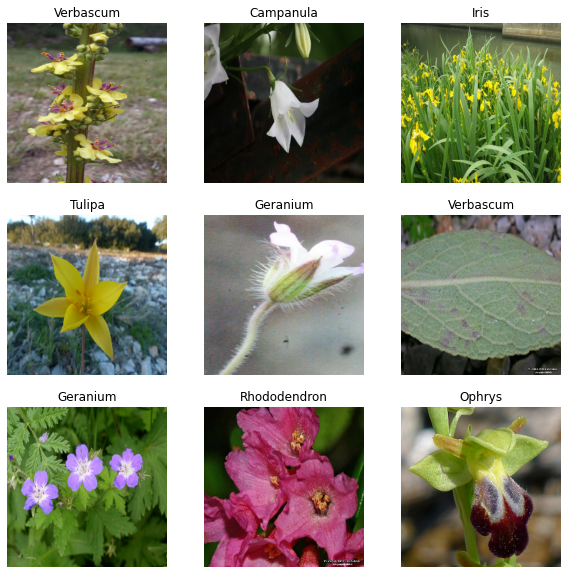

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Baseline CNN model

Requirements

In [21]:
from __future__ import print_function

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import preprocess_input

In [22]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [23]:
val_dataset = image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=123,
    validation_split=0.2, subset="validation", interpolation='bilinear', follow_links=False)

Found 4340 files belonging to 16 classes.
Using 868 files for validation.


In [24]:
from tensorflow.keras import layers

In [25]:
img_height, img_width = (256,256)

In [26]:
num_classes = 16

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [38]:
import tensorflow.keras.losses 

model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0

In [37]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/10


ValueError: in user code:

    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:759 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:388 update_state
        self.build(y_pred, y_true)
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:319 build
        self._metrics, y_true, y_pred)
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1139 map_structure_up_to
        **kwargs)
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1235 map_structure_with_tuple_paths_up_to
        *flat_value_lists)]
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1234 <listcomp>
        results = [func(*args, **kwargs) for args in zip(flat_path_list,
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1137 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:419 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:419 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:438 _get_metric_object
        metric_obj = metrics_mod.get(metric)
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:3483 get
        return deserialize(str(identifier))
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:3443 deserialize
        printable_module_name='metric function')
    /Users/momeni/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:378 deserialize_keras_object
        'Unknown ' + printable_module_name + ': ' + object_name)

    ValueError: Unknown metric function: f1


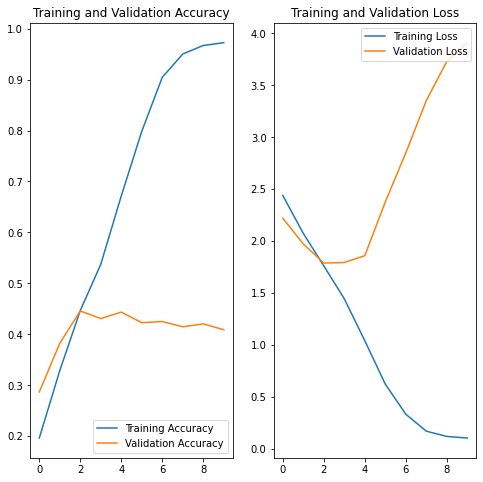

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
y_pred=model.predict(val_dataset)

In [53]:
predictions_class=[]

for i in y_pred:
    predictions_class.append(i.argmax())

In [54]:
predictions_class

[0,
 10,
 3,
 0,
 1,
 0,
 9,
 9,
 6,
 9,
 12,
 1,
 2,
 1,
 0,
 6,
 3,
 0,
 14,
 0,
 3,
 6,
 6,
 1,
 9,
 0,
 10,
 3,
 9,
 6,
 6,
 15,
 9,
 6,
 15,
 10,
 10,
 6,
 9,
 3,
 9,
 3,
 3,
 3,
 3,
 6,
 1,
 10,
 3,
 10,
 9,
 0,
 3,
 10,
 3,
 3,
 9,
 0,
 0,
 0,
 9,
 3,
 14,
 15,
 3,
 0,
 10,
 1,
 3,
 0,
 6,
 3,
 10,
 6,
 0,
 9,
 3,
 9,
 14,
 3,
 10,
 3,
 0,
 9,
 3,
 3,
 3,
 1,
 1,
 9,
 3,
 3,
 12,
 10,
 1,
 10,
 0,
 3,
 3,
 3,
 3,
 10,
 0,
 1,
 10,
 3,
 9,
 10,
 10,
 3,
 0,
 0,
 6,
 1,
 3,
 10,
 3,
 0,
 9,
 10,
 0,
 3,
 0,
 6,
 6,
 10,
 10,
 1,
 9,
 0,
 3,
 10,
 9,
 6,
 14,
 6,
 3,
 14,
 3,
 3,
 0,
 14,
 10,
 1,
 10,
 0,
 3,
 6,
 6,
 14,
 10,
 3,
 3,
 3,
 3,
 3,
 3,
 9,
 12,
 3,
 6,
 10,
 9,
 3,
 1,
 9,
 3,
 10,
 9,
 6,
 9,
 3,
 9,
 6,
 14,
 9,
 8,
 14,
 10,
 10,
 0,
 3,
 9,
 9,
 0,
 3,
 14,
 2,
 0,
 6,
 3,
 3,
 0,
 3,
 3,
 6,
 14,
 10,
 1,
 6,
 10,
 0,
 0,
 3,
 0,
 7,
 10,
 14,
 3,
 10,
 3,
 3,
 3,
 13,
 9,
 1,
 14,
 0,
 0,
 3,
 6,
 2,
 0,
 3,
 10,
 10,
 14,
 1,
 10,
 3,
 0,
 9,
 6,
 3,
 11,
 9,

In [94]:
for images, labels in val_dataset.take(2):  # only take first element of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

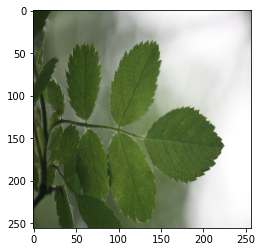

In [95]:
numpy_images[0]

plt.imshow(numpy_images[0].astype("uint8"))

In [96]:
numpy_labels

array([12, 10, 12, 14,  6,  6,  9,  6,  0, 10, 10, 10, 14,  9,  1, 10, 10,
        1,  3,  2,  4, 14, 10, 10, 14,  3, 13, 10, 12,  0,  6,  9],
      dtype=int32)

In [88]:
val_dataset.class_names[0]

'Campanula'